In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from numpy import absolute
from numpy import mean
from numpy import std
import math

In [2]:
import pandas as pd
supCharDf = pd.read_csv('./output/supplier_characteristics_details.csv')
supCharDf

,POId,SupplierId,SupplierName,CommodityId,CommodityName,OrderedQuantity,TotalQuantityReceived,TotalQuantityRejected,Price,OrderedDate,NeedByDate,ReceivedDate,PercentageRejected,DiffDays,POQuality,POTimeliness,HistQuality,HistTimeliness
0,PO41,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,50,90,40,42.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/27/2022 12:00 AM,44.44,-32,6.0,1.0,6.0,10.0
1,PO42,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,50,105,55,37.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/07/2022 12:00 AM,52.38,-12,5.0,10.0,6.0,10.0
2,PO43,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,10,35,25,50.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,10/30/2022 12:00 AM,71.43,-4,3.0,10.0,6.0,10.0
3,PO44,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,100,110,10,62.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/07/2022 12:00 AM,9.09,-12,10.0,10.0,6.0,10.0
4,PO45,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,100,180,80,58.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/11/2022 12:00 AM,44.44,-16,6.0,10.0,6.0,10.0
5,PO46,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,100,125,25,49.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/20/2022 12:00 AM,20.00,-25,9.0,10.0,6.0,10.0
6,PO47,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,100,195,95,64.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/22/2022 12:00 AM,48.72,-27,6.0,10.0,6.0,10.0
7,PO48,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,50,55,5,56.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,11/29/2022 12:00 AM,9.09,-34,10.0,1.0,6.0,10.0
8,PO49,100,JCN Technologies (AN - Fulfillment FT),432118,NaN,100,125,25,39.0,10/27/2022 12:00 AM,10/26/2022 12:00 AM,12/27/2022 12:00 AM,20.00,-62,9.0,1.0,6.0,10.0
9,PO50,SUPPLIERRPC06,NaN,432118,NaN,50,135,85,65.0,10/27/2022 12:00 AM,10/27/2022 12:00 AM,10/30/2022 12:00 AM,62.96,-3,4.0,10.0,6.0,10.0


In [3]:
supCharDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POId                   29 non-null     object 
 1   SupplierId             29 non-null     object 
 2   SupplierName           9 non-null      object 
 3   CommodityId            29 non-null     int64  
 4   CommodityName          0 non-null      float64
 5   OrderedQuantity        29 non-null     int64  
 6   TotalQuantityReceived  29 non-null     int64  
 7   TotalQuantityRejected  29 non-null     int64  
 8   Price                  29 non-null     float64
 9   OrderedDate            29 non-null     object 
 10  NeedByDate             29 non-null     object 
 11  ReceivedDate           29 non-null     object 
 12  PercentageRejected     29 non-null     float64
 13  DiffDays               29 non-null     int64  
 14  POQuality              29 non-null     float64
 15  POTimeli

In [6]:
dataDf = supCharDf[['CommodityId', 'Price', 'POQuality', 'POTimeliness']]
dataDf

,CommodityId,Price,POQuality,POTimeliness
0,82111502,220.020000,1.0,10.0
1,432118,10.250000,1.0,10.0
2,432118,10.890630,1.0,10.0
3,432118,10.890625,4.0,10.0
4,432118,10.890625,7.0,10.0
5,432118,20.639063,4.0,10.0
6,432118,25.978125,6.0,10.0
7,432118,38.303125,8.0,10.0
8,432118,144.383125,3.0,10.0
9,432118,14.821875,5.0,10.0


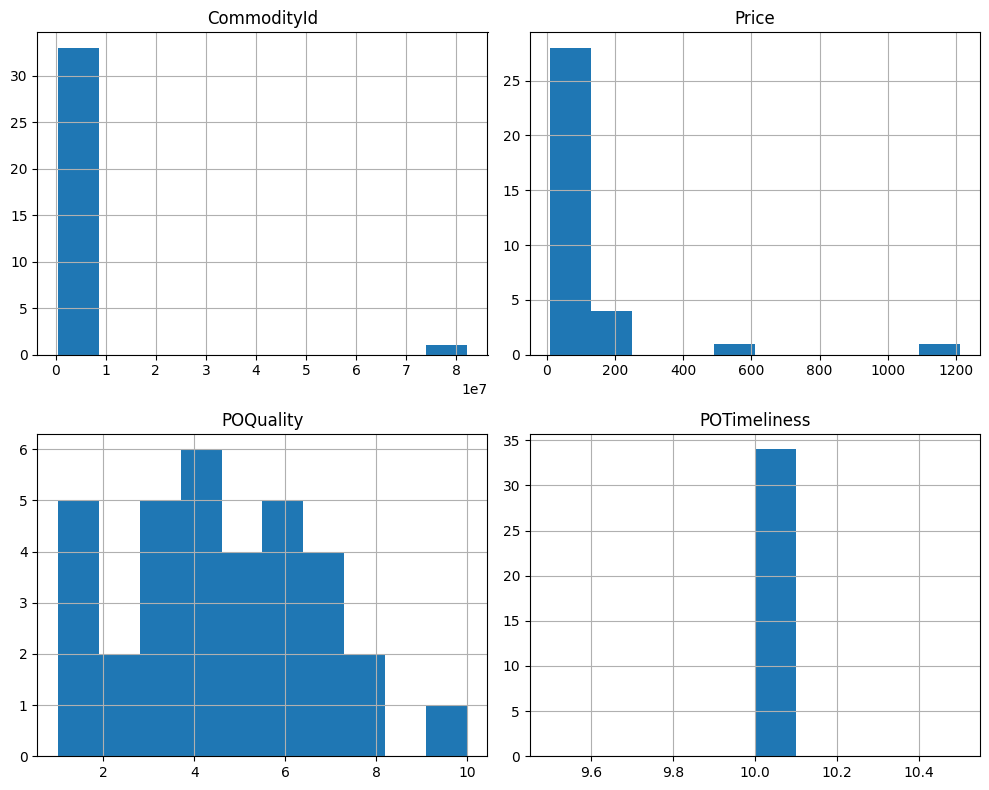

In [7]:
dataDf.hist(figsize=(10,8))
plt.tight_layout()

In [8]:
X = dataDf.drop(columns=['POQuality', 'POTimeliness'], axis=1)
y = dataDf[['POQuality', 'POTimeliness']]
X

,CommodityId,Price
0,82111502,220.020000
1,432118,10.250000
2,432118,10.890630
3,432118,10.890625
4,432118,10.890625
5,432118,20.639063
6,432118,25.978125
7,432118,38.303125
8,432118,144.383125
9,432118,14.821875


In [9]:
y

,POQuality,POTimeliness
0,1.0,10.0
1,1.0,10.0
2,1.0,10.0
3,4.0,10.0
4,7.0,10.0
5,4.0,10.0
6,6.0,10.0
7,8.0,10.0
8,3.0,10.0
9,5.0,10.0


In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x

,CommodityId,Price
9,432118,14.821875
10,432118,595.000000
19,432118,125.346313
6,432118,25.978125
14,432118,101.468750
3,432118,10.890625
27,432118,30.642006
2,432118,10.890630
30,432118,12.186875
8,432118,144.383125


# Linear Regression for Multioutput Regression

In [11]:
#Linear regression 
model = LinearRegression()
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 


print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[ 4.74135028 10.        ]
 [ 4.73786317 10.        ]
 [ 4.74068599 10.        ]
 [ 4.74128323 10.        ]
 [ 4.7408295  10.        ]]
Mean Absolute Error on train dataset :  1.0233941882114783
Mean Squared Error on train dataset :  1.6952282053630732


In [12]:
test_x

,CommodityId,Price
24,432118,43.929063
5,432118,20.639063
13,432118,42.500000
0,82111502,220.020000
22,432118,16.872947
12,432118,175.248750
15,432118,33.936250


In [13]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[ 4.74117534 10.        ]
 [ 4.74131532 10.        ]
 [ 4.74118393 10.        ]
 [ 4.74011696 10.        ]
 [ 4.74133796 10.        ]]
Mean Absolute Error on test dataset :  0.7301231685459609
Mean Squared Error on test dataset :  1.3565393629521993


In [14]:
testData = pd.DataFrame([[432118, 10300.0000]])
predict_test = model.predict(testData)
predict_test

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 4.67953206, 10.        ]])

In [15]:
print('Quality = ', round(predict_test[0][0]))
print('Timeliness = ', round(predict_test[0][1]))

Quality =  5
Timeliness =  10


In [16]:
testData = pd.DataFrame([[53, 200.0000]])
predict_test = model.predict(testData)
predict_test

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 4.74023729, 10.        ]])

In [17]:
print('Quality = ', round(predict_test[0][0]))
print('Timeliness = ', round(predict_test[0][1]))

Quality =  5
Timeliness =  10


# k-Nearest Neighbors for Multioutput Regression

In [18]:
# KNN algorithm
model = KNeighborsRegressor()
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[ 3.8 10. ]
 [ 3.2 10. ]
 [ 4.2 10. ]
 [ 4.  10. ]
 [ 7.  10. ]]
Mean Absolute Error on train dataset :  0.7703703703703705
Mean Squared Error on train dataset :  1.2909944487358058


In [19]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[ 5.8 10. ]
 [ 3.4 10. ]
 [ 5.8 10. ]
 [ 4.2 10. ]
 [ 4.  10. ]]
Mean Absolute Error on test dataset :  0.8714285714285712
Mean Squared Error on test dataset :  1.401020036565196


In [20]:
testData = pd.DataFrame([[432118, 10300.0000]])
predict_test = model.predict(testData)
predict_test

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[ 3.6, 10. ]])

In [21]:
print('Quality = ', round(predict_test[0][0]))
print('Timeliness = ', round(predict_test[0][1]))

Quality =  4
Timeliness =  10


In [22]:
testData = pd.DataFrame([[53, 200.0000]])
predict_test = model.predict(testData)
predict_test

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[ 4.2, 10. ]])

In [23]:
print('Quality = ', round(predict_test[0][0]))
print('Timeliness = ', round(predict_test[0][1]))

Quality =  4
Timeliness =  10


# Decision Tree for Multioutput Regression

In [24]:
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('Mean and Std Dev: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean and Std Dev: 1.218 (0.252)


In [25]:
# predict the target on the train dataset
model.fit(train_x, train_y)
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[ 5. 10.]
 [ 1. 10.]
 [ 4. 10.]
 [ 6. 10.]
 [ 7. 10.]]
Mean Absolute Error on train dataset :  0.05555555555555555
Mean Squared Error on train dataset :  0.28867513459481287


In [26]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[ 7. 10.]
 [ 3. 10.]
 [ 7. 10.]
 [ 3. 10.]
 [ 4. 10.]]
Mean Absolute Error on test dataset :  1.0
Mean Squared Error on test dataset :  1.6035674514745464


In [27]:
testData = pd.DataFrame([[432118, 10300.0000]])
predict_test = model.predict(testData)
predict_test

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([[ 6., 10.]])

In [28]:
print('Quality = ', round(predict_test[0][0]))
print('Timeliness = ', round(predict_test[0][1]))

Quality =  6
Timeliness =  10


In [29]:
testData = pd.DataFrame([[53, 200.0000]])
predict_test = model.predict(testData)
predict_test

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([[ 3., 10.]])

In [30]:
print('Quality = ', round(predict_test[0][0]))
print('Timeliness = ', round(predict_test[0][1]))

Quality =  3
Timeliness =  10


# Model Metrics
Linear Regression:
 - Mean Absolute Error on test dataset :  0.46881460692915583
 - Mean Squared Error on test dataset :  0.5845821457250611

KNN
 - Mean Absolute Error on test dataset :  0.08421052631578947
 - Mean Squared Error on test dataset :  0.3244428422615251

Decision Tree
 - Mean Absolute Error on test dataset :  0.02631578947368421
 - Mean Squared Error on test dataset :  0.22941573387056177